Spotify Music Analysis

In [1]:
#Data Set - Spotify 2010 - 2019 Top 100 Songs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#from pandas.plotting import autocorrelation_plot
#import seaborn as sns
#from pandas.plotting import scatter_matrix
#from pandas.plotting import autocorrelation_plot
#from pandas.plotting import parallel_coordinates
#from pandas.plotting import lag_plot

In [2]:
df = pd.read_csv("Spotify 2010 - 2019 Top 100.csv")

In [3]:
df.columns

Index(['title', 'artist', 'top genre', 'year released', 'added', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop', 'top year',
       'artist type'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          1000 non-null   object
 1   artist         1000 non-null   object
 2   top genre      1000 non-null   object
 3   year released  1000 non-null   int64 
 4   added          1000 non-null   object
 5   bpm            1000 non-null   int64 
 6   nrgy           1000 non-null   int64 
 7   dnce           1000 non-null   int64 
 8   dB             1000 non-null   int64 
 9   live           1000 non-null   int64 
 10  val            1000 non-null   int64 
 11  dur            1000 non-null   int64 
 12  acous          1000 non-null   int64 
 13  spch           1000 non-null   int64 
 14  pop            1000 non-null   int64 
 15  top year       1000 non-null   int64 
 16  artist type    1000 non-null   object
dtypes: int64(12), object(5)
memory usage: 132.9+ KB


In [5]:
df.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,70,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,68,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,72,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,80,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,79,2010,Solo


In [6]:
df.isnull().sum()

title            0
artist           0
top genre        0
year released    0
added            0
bpm              0
nrgy             0
dnce             0
dB               0
live             0
val              0
dur              0
acous            0
spch             0
pop              0
top year         0
artist type      0
dtype: int64

In [7]:
df = df.drop(columns=['added'])
df

,title,artist,top genre,year released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,140,81,61,-6,23,23,203,0,6,70,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,138,89,68,-4,36,83,192,1,8,68,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,95,48,84,-7,9,96,243,20,3,72,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,93,87,66,-4,4,38,180,11,12,80,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,104,85,69,-6,9,74,268,39,5,79,2010,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SICKO MODE,Travis Scott,hip hop,2018,155,73,83,-4,12,45,313,1,22,86,2019,Solo
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,80,50,55,-9,80,41,190,23,7,85,2019,Solo
997,Boasty (feat. Idris Elba),Wiley,grime,2019,103,77,89,-5,9,46,177,1,7,68,2019,Solo
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,138,58,53,-6,10,59,214,1,10,67,2019,Duo


In [8]:
df["top genre"].value_counts() # 132 top genres for categories 

dance pop           361
pop                  57
atl hip hop          39
art pop              37
boy band             21
                   ... 
lilith                1
disco house           1
social media pop      1
contemporary r&b      1
rap                   1
Name: top genre, Length: 132, dtype: int64

In [9]:
#Use encoder to create values for the Categories in Top Genre
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df['genre_cat']= ""
df['genre_cat'] = ord_enc.fit_transform(df[["top genre"]])
df[['top genre', 'genre_cat']].head()


,top genre,genre_cat
0,dance pop,51.0
1,dance pop,51.0
2,pop soul,122.0
3,atl hip hop,14.0
4,atl hip hop,14.0


In [10]:
df

,title,artist,top genre,year released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type,genre_cat
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,140,81,61,-6,23,23,203,0,6,70,2010,Duo,51.0
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,138,89,68,-4,36,83,192,1,8,68,2010,Duo,51.0
2,I Need A Dollar,Aloe Blacc,pop soul,2010,95,48,84,-7,9,96,243,20,3,72,2010,Solo,122.0
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,93,87,66,-4,4,38,180,11,12,80,2010,Solo,14.0
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,104,85,69,-6,9,74,268,39,5,79,2010,Solo,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SICKO MODE,Travis Scott,hip hop,2018,155,73,83,-4,12,45,313,1,22,86,2019,Solo,85.0
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,80,50,55,-9,80,41,190,23,7,85,2019,Solo,85.0
997,Boasty (feat. Idris Elba),Wiley,grime,2019,103,77,89,-5,9,46,177,1,7,68,2019,Solo,83.0
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,138,58,53,-6,10,59,214,1,10,67,2019,Duo,4.0


In [11]:
#Use encoder to create values for the Categories in Artist type

ord_enc = OrdinalEncoder()
df['artist_cat']= ""
df['artist_cat'] = ord_enc.fit_transform(df[["artist type"]])
df[['artist type', 'artist_cat']].head()

,artist type,artist_cat
0,Duo,1.0
1,Duo,1.0
2,Solo,2.0
3,Solo,2.0
4,Solo,2.0


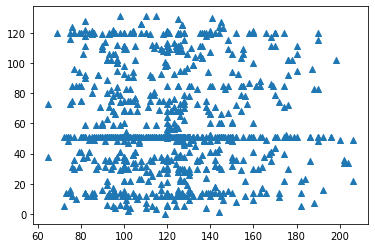

In [12]:
plt.scatter(df.bpm ,df.genre_cat,marker="^")
plt.show()

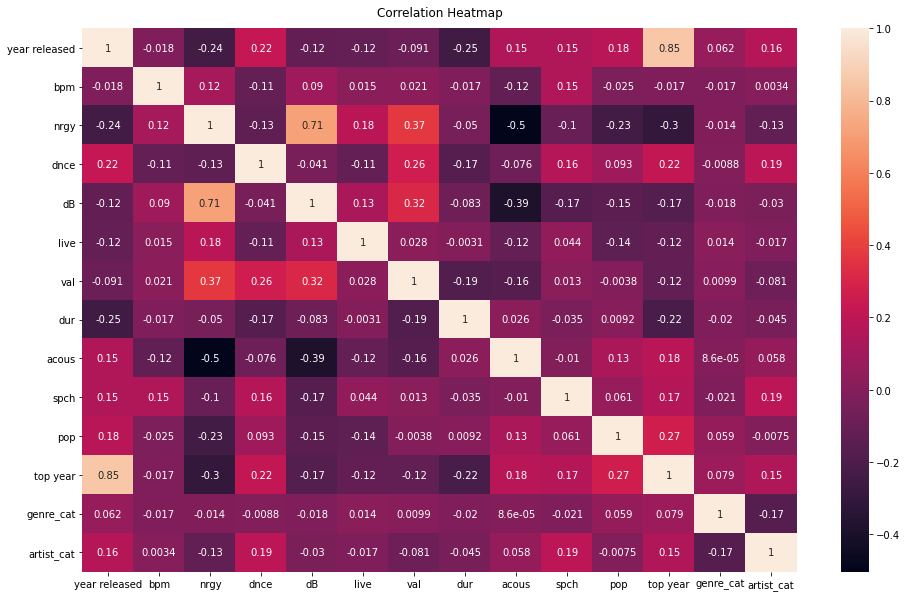

In [13]:
import seaborn as sns

plt.figure(figsize=(16,10))

corr_heat = sns.heatmap(df.corr(), annot=True)
corr_heat.set_title("Correlation Heatmap", pad=12);
plt.show()

There is a high correlation between genre and top year. This implies that certain genres are popular in a specific year.

# Recommendation System using K-means Clustering

In [15]:
df = df.drop_duplicates(subset='title')
df

,title,artist,top genre,year released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type,genre_cat,artist_cat
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,140,81,61,-6,23,23,203,0,6,70,2010,Duo,51.0,1.0
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,138,89,68,-4,36,83,192,1,8,68,2010,Duo,51.0,1.0
2,I Need A Dollar,Aloe Blacc,pop soul,2010,95,48,84,-7,9,96,243,20,3,72,2010,Solo,122.0,2.0
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,93,87,66,-4,4,38,180,11,12,80,2010,Solo,14.0,2.0
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,104,85,69,-6,9,74,268,39,5,79,2010,Solo,14.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,You Need To Calm Down,Taylor Swift,pop,2019,85,67,77,-6,6,71,171,1,6,81,2019,Solo,120.0,2.0
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,80,50,55,-9,80,41,190,23,7,85,2019,Solo,85.0,2.0
997,Boasty (feat. Idris Elba),Wiley,grime,2019,103,77,89,-5,9,46,177,1,7,68,2019,Solo,83.0,2.0
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,138,58,53,-6,10,59,214,1,10,67,2019,Duo,4.0,1.0


In [16]:
df_subset = df[['title', 'artist', 'top genre', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'acous', 'spch', 'pop']]
df_subset

,title,artist,top genre,bpm,nrgy,dnce,dB,live,val,acous,spch,pop
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,140,81,61,-6,23,23,0,6,70
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,138,89,68,-4,36,83,1,8,68
2,I Need A Dollar,Aloe Blacc,pop soul,95,48,84,-7,9,96,20,3,72
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,93,87,66,-4,4,38,11,12,80
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,104,85,69,-6,9,74,39,5,79
...,...,...,...,...,...,...,...,...,...,...,...,...
994,You Need To Calm Down,Taylor Swift,pop,85,67,77,-6,6,71,1,6,81
996,EARFQUAKE,"Tyler, The Creator",hip hop,80,50,55,-9,80,41,23,7,85
997,Boasty (feat. Idris Elba),Wiley,grime,103,77,89,-5,9,46,1,7,68
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,138,58,53,-6,10,59,1,10,67


In [17]:
import copy
import random

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.spatial import distance
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

In [18]:
df1=copy.deepcopy(df_subset)
df1.drop(columns=['title','artist','top genre', 'pop'],inplace=True)
df1

,bpm,nrgy,dnce,dB,live,val,acous,spch
0,140,81,61,-6,23,23,0,6
1,138,89,68,-4,36,83,1,8
2,95,48,84,-7,9,96,20,3
3,93,87,66,-4,4,38,11,12
4,104,85,69,-6,9,74,39,5
...,...,...,...,...,...,...,...,...
994,85,67,77,-6,6,71,1,6
996,80,50,55,-9,80,41,23,7
997,103,77,89,-5,9,46,1,7
998,138,58,53,-6,10,59,1,10


In [19]:
from sklearn.preprocessing import MinMaxScaler

d_types = ['int16','int32', 'int64', 'float16', 'float32', 'float64']
normalize = df1.select_dtypes(include=d_types)
print(normalize)

for col in normalize.columns:
    MinMaxScaler(col)

     bpm  nrgy  dnce  dB  live  val  acous  spch
0    140    81    61  -6    23   23      0     6
1    138    89    68  -4    36   83      1     8
2     95    48    84  -7     9   96     20     3
3     93    87    66  -4     4   38     11    12
4    104    85    69  -6     9   74     39     5
..   ...   ...   ...  ..   ...  ...    ...   ...
994   85    67    77  -6     6   71      1     6
996   80    50    55  -9    80   41     23     7
997  103    77    89  -5     9   46      1     7
998  138    58    53  -6    10   59      1    10
999   98    59    80  -7    13   18      2    15

[945 rows x 8 columns]


In [20]:
rand_seed = random.seed(42)

In [21]:
from sklearn.model_selection import GridSearchCV

kmeans = KMeans()
params = {"n_clusters": list(range(1, 101)),}

grid_clf = GridSearchCV(estimator=kmeans, param_grid=params, cv=5, verbose=2)
grid_clf.fit(normalize)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END .......................................n_clusters=1; total time=   1.1s
[CV] END .......................................n_clusters=1; total time=   1.0s
[CV] END .......................................n_clusters=1; total time=   1.0s
[CV] END .......................................n_clusters=1; total time=   1.1s
[CV] END .......................................n_clusters=1; total time=   1.0s
[CV] END .......................................n_clusters=2; total time=   0.1s
[CV] END .......................................n_clusters=2; total time=   0.1s
[CV] END .......................................n_clusters=2; total time=   0.1s
[CV] END .......................................n_clusters=2; total time=   0.2s
[CV] END .......................................n_clusters=2; total time=   0.1s
[CV] END .......................................n_clusters=3; total time=   0.1s
[CV] END .....................................

GridSearchCV(cv=5, estimator=KMeans(),
             param_grid={'n_clusters': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                        23, 24, 25, 26, 27, 28, 29, 30, ...]},
             verbose=2)

In [22]:
# optimal value for k (kmeans_n_cluster)
grid_clf.best_params_

{'n_clusters': 98}

In [42]:
k = 98
km = KMeans(n_clusters=k, random_state=rand_seed)
predict = km.fit_predict(normalize)

df_subset['predict'] = predict
MinMaxScaler(df_subset['predict'])

MinMaxScaler(feature_range=0      73
1      28
2      94
3      92
4      91
       ..
994    38
996    45
997    63
998    48
999    21
Name: predict, Length: 945, dtype: int32)

In [43]:
class Song_recommendation():
    def __init__(self, data):
        self.data = data
    
    def recommend_song(self, songs, amount=1):
    # recommend songs name of song given
        distance = []
        song = self.data[(self.data.title.str.lower() == songs.lower())].head(1).values[0]
        rec = self.data[self.data.title.str.lower() != songs.lower()]
        for songs in tqdm(rec.values):
            dis = 0
            for col in np.arange(len(rec.columns)):
                if not col in [0, 1, 2, 3, 14]:
                    dis = dis + np.absolute(float(song[col]) - float(songs[col]))
            distance.append(dis)
        rec['distance'] = distance
        rec = rec.sort_values('distance')
        columns = ['artist', 'title', 'top genre']
        return rec[columns][:amount]

    def recommend_artist(self, artists, amount=1):
    # recommend songs from other artists based on the name of artist given
        distance = []
        artist = self.data[(self.data.artist.str.lower() == artists.lower())].head(1).values[0]
        rec = self.data[self.data.artist.str.lower() != artists.lower()]
        for artists in tqdm(rec.values):
            dis = 0
            for col in np.arange(len(rec.columns)):
                if not col in [0, 1, 2, 3, 14]:
                    dis = dis + np.absolute(float(artist[col]) - float(artists[col]))
            distance.append(dis)
        rec['distance'] = distance
        rec = rec.sort_values('distance')
        columns = ['artist', 'title', 'top genre']
        return rec[columns][:amount]

In [44]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("Over", 10)  # Canadian Hip Hop, Drake

100%|██████████| 944/944 [00:00<00:00, 16276.11it/s]


,artist,title,top genre
545,Luke Christopher,Lot to Learn,indie pop rap
31,Jason Derulo,Ridin' Solo,dance pop
403,Aloe Blacc,The Man,pop soul
624,David Guetta,This One's for You (feat. Zara Larsson) (Offic...,big room
501,Alessia Cara,Here,canadian contemporary r&b
844,Hugh Jackman,The Greatest Show,hollywood
275,Phillip Phillips,Home,folk-pop
125,Coldplay,Every Teardrop Is a Waterfall,permanent wave
250,Kesha,C'Mon,dance pop
484,Sia,Elastic Heart,australian dance


In [45]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("Animal", 10) # modern alternative rock, Neon Trees

100%|██████████| 944/944 [00:00<00:00, 17163.17it/s]


,artist,title,top genre
307,Avril Lavigne,Here's to Never Growing Up,canadian pop
263,Neon Trees,Everybody Talks,modern alternative rock
367,Michael Bublé,It's a Beautiful Day,adult standards
154,Katy Perry,E.T.,dance pop
339,Flo Rida,I Cry,dance pop
272,P!nk,Blow Me (One Last Kiss),dance pop
109,Blake Shelton,Honey Bee,contemporary country
68,Scouting For Girls,This Ain't a Love Song,dance pop
181,Pitbull,Hey Baby (Drop It to the Floor) (feat. T-Pain),dance pop
54,Maroon 5,Misery,pop


In [47]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("Riverside", 10) # dutch house, Sidney Samson

100%|██████████| 944/944 [00:00<00:00, 18880.29it/s]


,artist,title,top genre
772,PNAU,Chameleon,alternative dance
88,Tinie Tempah,Written in the Stars (feat. Eric Turner),dance pop
685,Steve Aoki,Just Hold On,dance pop
386,Stromae,Papaoutai,belgian pop
481,ScHoolboy Q,Man Of The Year,gangster rap
883,Sigrid,Strangers,dance pop
491,Tiësto,Wasted,big room
665,MØ,Final Song,art pop
422,David Guetta,Bad (feat. Vassy) - Radio Edit,big room
926,Doja Cat,Juicy,dance pop


In [48]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("If I die young", 10) # contemporary country, the band perry

100%|██████████| 944/944 [00:00<00:00, 15734.04it/s]


,artist,title,top genre
36,John Mayer,Heartbreak Warfare,neo mellow
949,Lady Gaga,Shallow,art pop
878,Post Malone,Better Now,dfw rap
602,Adele,Hello,british soul
541,Kygo,Nothing Left (feat. Will Heard),edm
753,Logic,1-800-273-8255,conscious hip hop
132,Drake,Headlines,canadian hip hop
968,Miley Cyrus,Slide Away,dance pop
160,Lady A,Just A Kiss,contemporary country
496,Trey Songz,Na Na,dance pop


In [49]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("mine", 10) # pop , taylor swift

100%|██████████| 944/944 [00:00<00:00, 17482.52it/s]


,artist,title,top genre
219,Chris Brown,Turn Up the Music,dance pop
147,Jason Derulo,Don't Wanna Go Home,dance pop
566,Robin Schulz,Sugar (feat. Francesco Yates),dance pop
492,Tiësto,Red Lights,big room
126,David Guetta,Where Them Girls At (feat. Nicki Minaj & Flo R...,big room
153,Katy Perry,Firework,dance pop
305,Avicii,Wake Me Up,dance pop
658,Major Lazer,Cold Water,dance pop
885,The 1975,It's Not Living (If It's Not With You),modern alternative rock
486,Taylor Swift,Style,pop


In [50]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("Dynamite", 10) # dance pop, taio cruz

100%|██████████| 944/944 [00:00<00:00, 22466.98it/s]


,artist,title,top genre
268,One Direction,What Makes You Beautiful,boy band
158,Kesha,Blow,dance pop
454,Maroon 5,Sugar,pop
452,Maroon 5,Maps,pop
244,Karmin,Brokenhearted,dance pop
328,Daft Punk,Get Lucky (feat. Pharrell Williams & Nile Rodg...,electro
629,DNCE,Cake By The Ocean,dance pop
281,Robbie Williams,Candy,dance pop
714,Calvin Harris,"Feels (feat. Pharrell Williams, Katy Perry & B...",dance pop
941,Jonas Brothers,Sucker,boy band


In [51]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("hard", 10) # barbarian pop, rihanna

100%|██████████| 944/944 [00:00<00:00, 19266.89it/s]


,artist,title,top genre
282,Rudimental,Feel the Love (feat. John Newman),dance pop
453,Maroon 5,Animals,pop
251,Lana Del Rey,Ride,art pop
426,DJ Snake,You Know You Like It,dance pop
327,Ciara,Body Party,dance pop
279,Rita Ora,R.I.P. (feat. Tinie Tempah),dance pop
309,Baauer,Harlem Shake,bass trap
248,Kendrick Lamar,m.A.A.d city,conscious hip hop
202,Alesso,Years,dance pop
221,Coldplay,Princess of China,permanent wave


In [52]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("bad romance", 10) # art pop by lady gaga

100%|██████████| 944/944 [00:00<00:00, 17812.13it/s]


,artist,title,top genre
120,Chris Brown,Yeah 3x,dance pop
292,Train,Drive By,dance pop
323,Capital Cities,Safe And Sound,metropopolis
321,Calvin Harris,Thinking About You (feat. Ayah Marar),dance pop
650,Justin Timberlake,CAN'T STOP THE FEELING! (from DreamWorks Anima...,dance pop
314,Bridgit Mendler,Ready or Not,dance pop
157,Kesha,We R Who We R,dance pop
929,Dua Lipa,Don't Start Now,dance pop
190,Selena Gomez & The Scene,Who Says,dance pop
871,MK,17,dance pop


In [53]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("baby", 10) # canadian pop, justin beiber

100%|██████████| 944/944 [00:00<00:00, 16858.01it/s]


,artist,title,top genre
224,Disclosure,Latch,edm
285,Snoop Dogg,"Young, Wild & Free (feat. Bruno Mars)",g funk
506,Beyoncé,7/11,dance pop
195,The Wanted,Glad You Came,boy band
396,will.i.am,Scream & Shout,dance pop
729,French Montana,Unforgettable,gangster rap
738,Imagine Dragons,Whatever It Takes,modern rock
210,B.o.B,So Good,atl hip hop
852,Kendrick Lamar,All The Stars (with SZA),conscious hip hop
556,One Direction,Drag Me Down,boy band


In [54]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("Memories (feat. Kid Cudi)", 15) # david guetta, big room

100%|██████████| 944/944 [00:00<00:00, 15225.33it/s]


,artist,title,top genre
870,Migos,Stir Fry,atl hip hop
824,DJ Khaled,No Brainer,dance pop
278,Rihanna,Where Have You Been,barbadian pop
703,A$AP Ferg,Plain Jane,gangster rap
163,Lil Wayne,6 Foot 7 Foot,hip hop
880,Rae Sremmurd,Powerglide (feat. Juicy J) - From SR3MM,hip hop
294,Trey Songz,Heart Attack,dance pop
951,Lauv,i'm so tired...,dance pop
625,Daya,"Sit Still, Look Pretty",alt z
431,G.R.L.,Ugly Heart,dance pop


In [55]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("rolling in the deep", 10) # british soul, adele

100%|██████████| 944/944 [00:00<00:00, 18878.49it/s]


,artist,title,top genre
583,The Weeknd,Can't Feel My Face,canadian contemporary r&b
63,Rihanna,What's My Name?,barbadian pop
556,One Direction,Drag Me Down,boy band
899,Zedd,The Middle,complextro
763,MGMT,Little Dark Age,alternative dance
905,Anuel AA,China,latin
259,Maroon 5,One More Night,pop
852,Kendrick Lamar,All The Stars (with SZA),conscious hip hop
937,iann dior,gone girl,melodic rap
864,Marshmello,Happier,brostep


In [56]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_artist("Taylor Swift", 10) # pop

100%|██████████| 927/927 [00:00<00:00, 17162.83it/s]


,artist,title,top genre
607,Ariana Grande,Dangerous Woman,dance pop
85,Timbaland,Carry Out (Featuring Justin Timberlake),dance pop
221,Coldplay,Princess of China,permanent wave
251,Lana Del Rey,Ride,art pop
888,The Weeknd,Call Out My Name,canadian contemporary r&b
731,G-Eazy,Him & I (with Halsey),indie pop rap
471,Paloma Faith,Only Love Can Hurt Like This,british soul
50,Lady Gaga,Alejandro,art pop
968,Miley Cyrus,Slide Away,dance pop
204,alt-J,Breezeblocks,indie rock


In [57]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_artist("Maroon 5", 10) # pop

100%|██████████| 934/934 [00:00<00:00, 16983.79it/s]


,artist,title,top genre
339,Flo Rida,I Cry,dance pop
228,Ellie Goulding,Lights - Single Version,dance pop
547,Major Lazer,Light It Up - Remix,dance pop
272,P!nk,Blow Me (One Last Kiss),dance pop
11,CeeLo Green,Forget You,atl hip hop
528,Flo Rida,GDFR (feat. Sage the Gemini & Lookas),dance pop
57,Miley Cyrus,Can't Be Tamed,dance pop
680,Shawn Mendes,I Know What You Did Last Summer,canadian pop
187,Rizzle Kicks,Down With The Trumpets,uk hip hop
388,Taylor Swift,22,pop


In [58]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_artist("Sara Bareilles", 10) # acoustic pop

100%|██████████| 944/944 [00:00<00:00, 28605.24it/s]


,artist,title,top genre
989,Shawn Mendes,If I Can't Have You,canadian pop
4,B.o.B,Nothin' on You (feat. Bruno Mars),atl hip hop
720,Clean Bandit,Rockabye (feat. Sean Paul & Anne-Marie),dance pop
702,A Boogie Wit da Hoodie,Drowning (feat. Kodak Black),melodic rap
893,Vance Joy,Saturday Sun,folk-pop
849,Jonas Blue,Rise,dance pop
972,NSG,Options,afro dancehall
839,George Ezra,Shotgun,folk-pop
646,Jonas Blue,Perfect Strangers,dance pop
553,Nico & Vinz,That's How You Know (feat. Kid Ink & Bebe Rexha),pop rap


In [59]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_artist("Ellie Goulding", 10) # dance pop

100%|██████████| 941/941 [00:00<00:00, 18096.80it/s]


,artist,title,top genre
68,Scouting For Girls,This Ain't a Love Song,dance pop
367,Michael Bublé,It's a Beautiful Day,adult standards
31,Jason Derulo,Ridin' Solo,dance pop
58,Neon Trees,Animal,modern alternative rock
402,Alesso,Heroes (we could be),dance pop
306,Avicii,I Could Be The One (Avicii Vs. Nicky Romero) -...,dance pop
431,G.R.L.,Ugly Heart,dance pop
683,Sigala,Sweet Lovin' - Radio Edit,dance pop
84,Tim Berg,Seek Bromance (Avicii Vocal Edit),edm
339,Flo Rida,I Cry,dance pop


In [60]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("Who's That Chick? (feat. Rihanna)", 10) # big room, david guetta

100%|██████████| 944/944 [00:00<00:00, 21953.13it/s]


,artist,title,top genre
17,Drake,Find Your Love,canadian hip hop
353,Katy Perry,This Is How We Do,dance pop
69,Sean Kingston,Eenie Meenie,dance pop
562,Rich Homie Quan,"Flex (Ooh, Ooh, Ooh)",atl hip hop
43,Kesha,Your Love Is My Drug,dance pop
381,Robin Thicke,Blurred Lines,contemporary r&b
44,Kesha,Take It Off,dance pop
620,Chris Brown,Back To Sleep,dance pop
184,Rihanna,S&M,barbadian pop
722,DJ Khaled,"I'm the One (feat. Justin Bieber, Quavo, Chanc...",dance pop


In [61]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("Every Teardrop Is a Waterfall", 10) # coldplay, permanent wave

100%|██████████| 944/944 [00:00<00:00, 21455.64it/s]


,artist,title,top genre
169,M83,Midnight City,french shoegaze
405,Ariana Grande,Love Me Harder,dance pop
513,Demi Lovato,Cool for the Summer,dance pop
162,Lady Gaga,The Edge Of Glory,art pop
514,Demi Lovato,Confident,dance pop
203,Alex Clare,Too Close,modern alternative rock
275,Phillip Phillips,Home,folk-pop
140,Florence + The Machine,Shake It Out,baroque pop
621,Clean Bandit,Tears (feat. Louisa Johnson),dance pop
797,Zara Larsson,I Would Like,dance pop


In [62]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("bad at love", 15) # halsey

100%|██████████| 944/944 [00:00<00:00, 18155.83it/s]


,artist,title,top genre
965,MEDUZA,Piece Of Your Heart,edm
859,Loud Luxury,Body,dance pop
185,Rihanna,We Found Love,barbadian pop
40,Katy Perry,Teenage Dream,dance pop
157,Kesha,We R Who We R,dance pop
19,Edward Maya,Stereo Love - Radio Edit,romanian house
179,P!nk,Raise Your Glass,dance pop
148,Jennifer Lopez,On The Floor,dance pop
650,Justin Timberlake,CAN'T STOP THE FEELING! (from DreamWorks Anima...,dance pop
61,Rihanna,Only Girl (In The World),barbadian pop


In [ ]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_artist("Rihanna", 10) # barbadian pop